___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [33]:
sns.set_style('whitegrid')
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [142]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [4]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [6]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [7]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

C:\Users\Isaac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


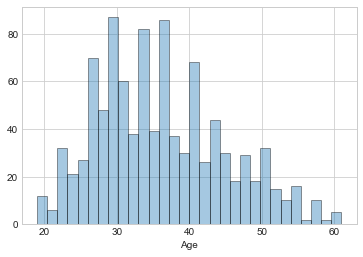

In [79]:
sns.distplot(ad_data['Age'], kde=False, bins=30, hist_kws=dict(edgecolor='k', linewidth=1))

**Create a jointplot showing Area Income versus Age.**

C:\Users\Isaac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


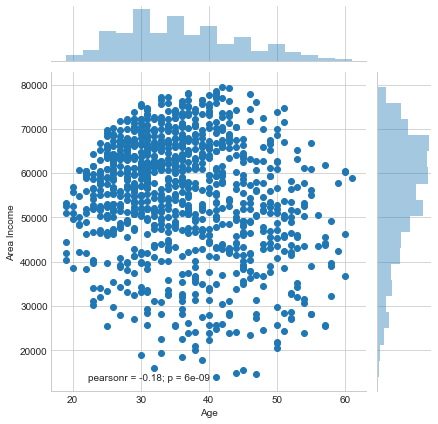

In [18]:
sns.jointplot(data=ad_data, x='Age', y='Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

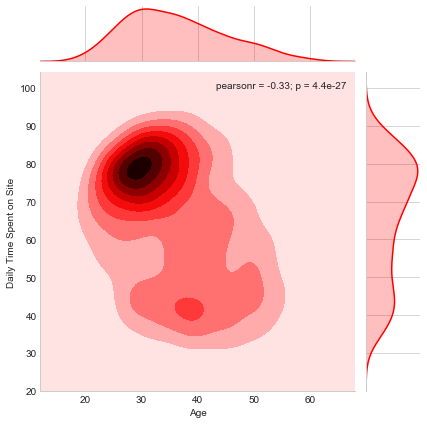

In [22]:
sns.jointplot(data=ad_data, x='Age', y='Daily Time Spent on Site', kind='kde', color='r')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

C:\Users\Isaac\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


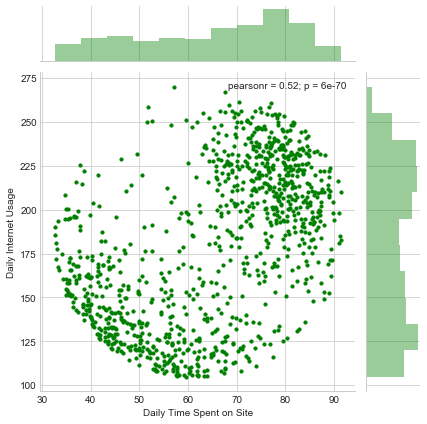

In [29]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', color='g', s=10)

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

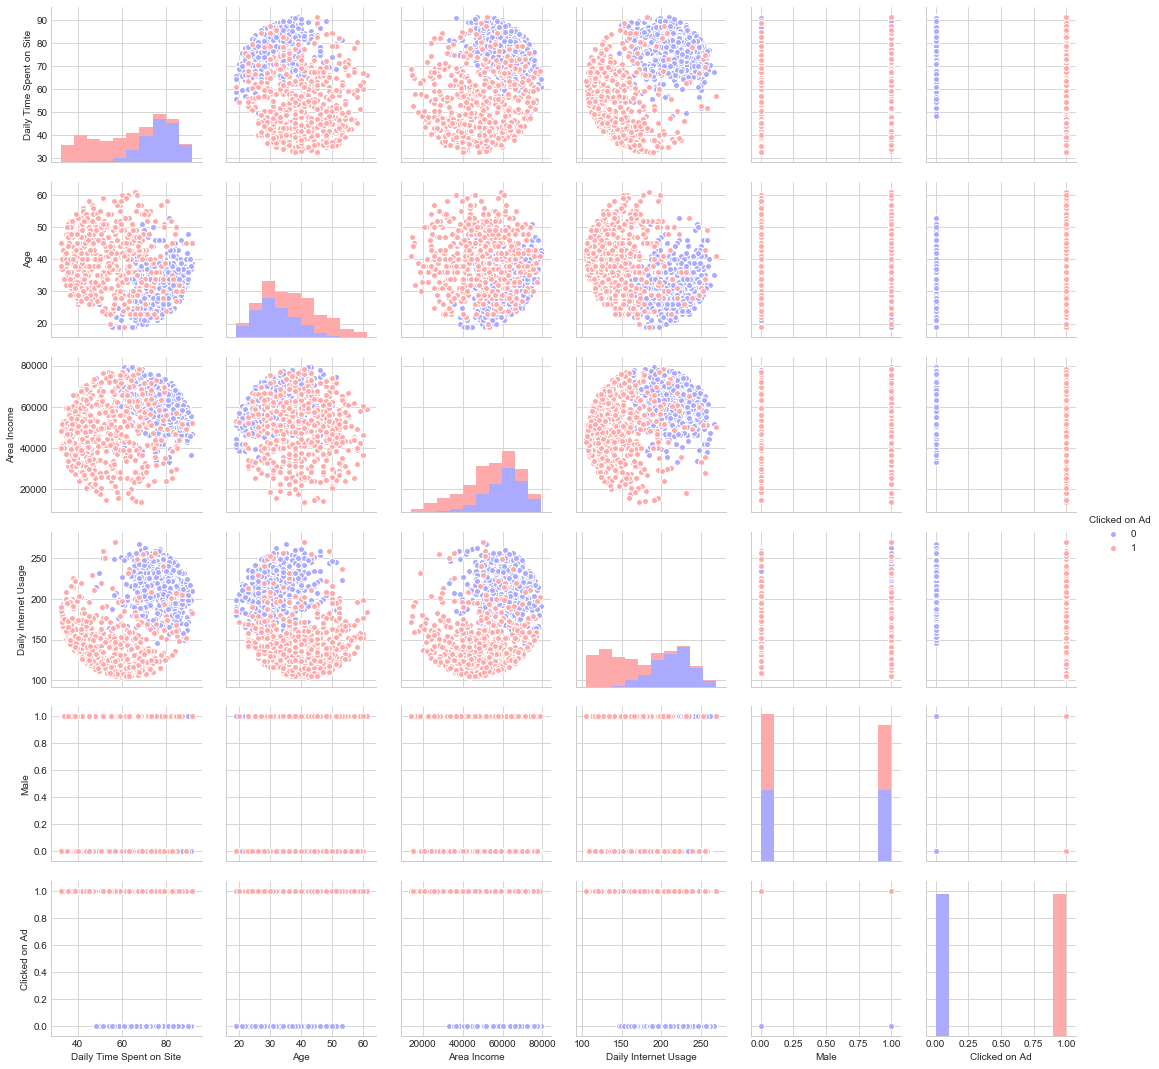

In [44]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [143]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

In [144]:
ad_data['Timestamp'][0].daysinmonth

31

In [145]:
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda t: t.hour + t.minute / 60 + t.second / 3600)
ad_data['Day Position'] = ad_data['Timestamp'].apply(lambda t: t.day / t.daysinmonth)
ad_data['Day Name'] = ad_data['Timestamp'].apply(lambda t: t.weekday_name[:3])
ad_data['Month'] = ad_data['Timestamp'].apply(lambda t: t.month)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Day Position,Day Name,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0.886389,0.870968,Sun,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1.650556,0.133333,Mon,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20.595000,0.419355,Sun,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2.521944,0.322581,Sun,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3.605000,0.100000,Fri,6


In [76]:
ad_data.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
Hour                         995
Day Position                  88
Day Name                       7
Month                          7
dtype: int64

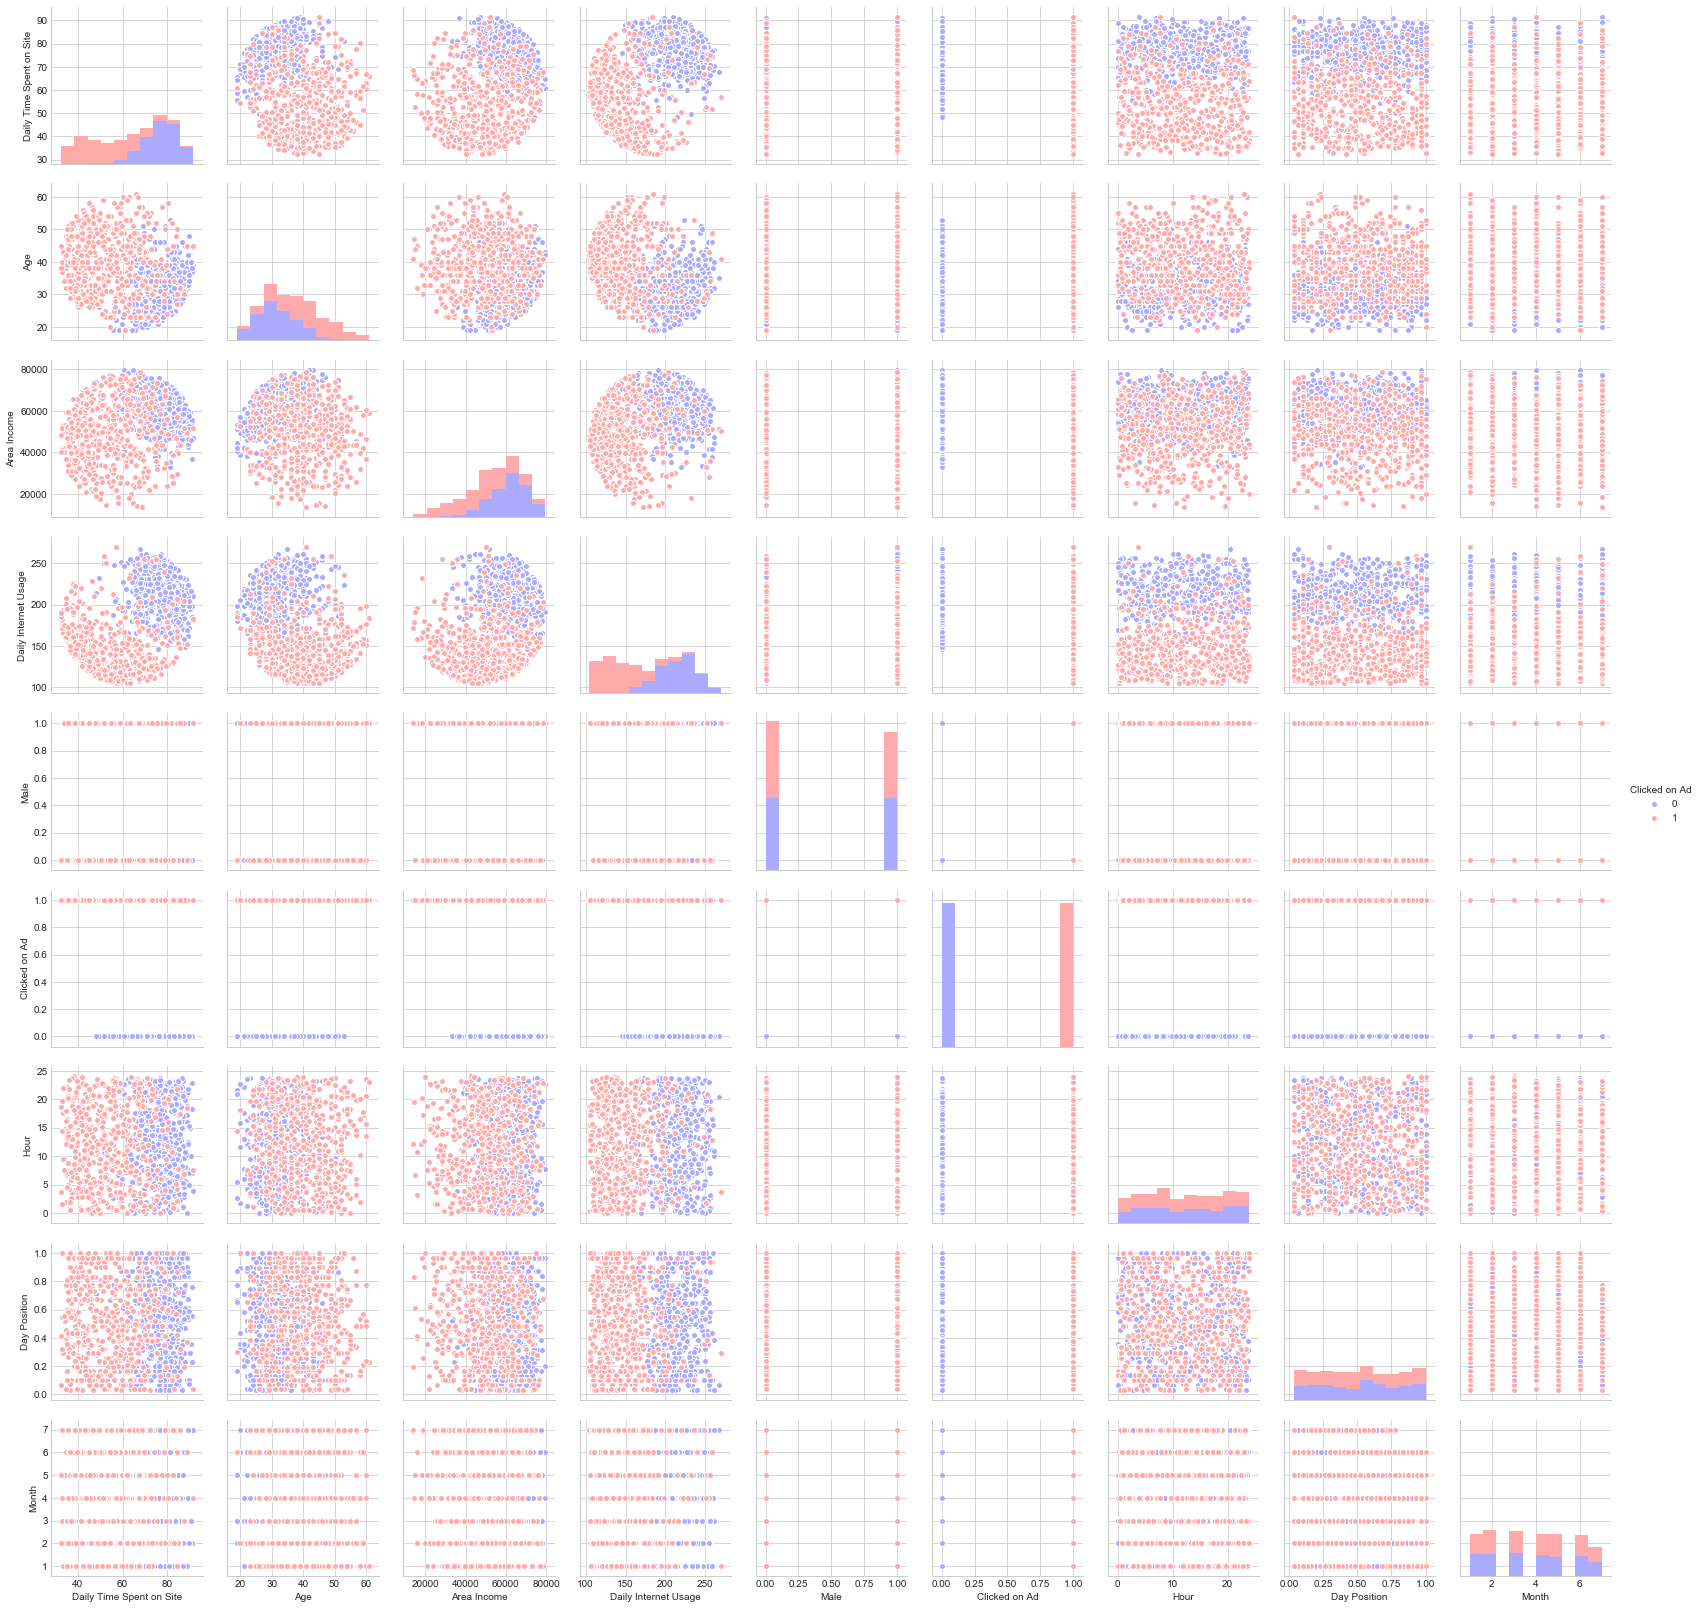

In [80]:
sns.pairplot(data=ad_data, hue='Clicked on Ad', palette='bwr')

In [146]:
ad_data = pd.concat([ad_data, pd.get_dummies(ad_data[['Day Name']], drop_first=True)], axis=1)

In [147]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Hour', 'Day Position', 'Day Name',
       'Month', 'Day Name_Mon', 'Day Name_Sat', 'Day Name_Sun', 'Day Name_Thu',
       'Day Name_Tue', 'Day Name_Wed'],
      dtype='object')

In [148]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
             'Daily Internet Usage', 'Male', 'Hour', 'Day Position',
             'Month', 'Day Name_Mon', 'Day Name_Sat', 'Day Name_Sun',
             'Day Name_Thu', 'Day Name_Tue', 'Day Name_Wed']]
y = ad_data['Clicked on Ad']

In [149]:
X.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Hour,Day Position,Month,Day Name_Mon,Day Name_Sat,Day Name_Sun,Day Name_Thu,Day Name_Tue,Day Name_Wed
0,68.95,35,61833.90,256.09,0,0.886389,0.870968,3,0,0,1,0,0,0
1,80.23,31,68441.85,193.77,1,1.650556,0.133333,4,1,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,20.595000,0.419355,3,0,0,1,0,0,0
3,74.15,29,54806.18,245.89,1,2.521944,0.322581,1,0,0,1,0,0,0
4,68.37,35,73889.99,225.58,0,3.605000,0.100000,6,0,0,0,0,0,0


In [150]:
scaler = preprocessing.StandardScaler()

In [151]:
X_cols_binary = X.loc[:,X.nunique() <= 2].columns
X_cols_num = X.loc[:,X.nunique() > 2].columns

In [152]:
scaler_X = scaler.fit(X[X_cols_num])

In [169]:
X_norm = pd.concat(
    [pd.DataFrame(scaler_X.transform(X[X_cols_num]), columns=X_cols_num),
     X[X_cols_binary]],
    axis=1
)
X_norm.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Hour,Day Position,Month,Male,Day Name_Mon,Day Name_Sat,Day Name_Sun,Day Name_Thu,Day Name_Tue,Day Name_Wed
0,0.249267,-0.114905,0.509691,1.734030,-1.619302,1.257519,-0.424193,0,0,0,1,0,0,0
1,0.961132,-0.570425,1.002530,0.313805,-1.509467,-1.310431,0.095015,1,1,0,0,0,0,0
2,0.282083,-1.139826,0.356949,1.287589,1.213456,-0.314695,-0.424193,0,0,0,1,0,0,0
3,0.577432,-0.798185,-0.014456,1.501580,-1.384221,-0.651598,-1.462610,1,0,0,1,0,0,0
4,0.212664,-0.114905,1.408868,1.038731,-1.228551,-1.426475,1.133432,0,0,0,0,0,0,0


In [171]:
#One way to reverse the feature normalization
old_X = pd.concat(
    [pd.DataFrame(scaler_X.inverse_transform(X_norm[X_cols_num]), columns=X_cols_num),
     X_norm[X_cols_binary]],
    axis=1
)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3)

** Train and fit a logistic regression model on the training set.**

In [173]:
logmodel = LogisticRegression()

In [174]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [175]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [179]:
print(metrics.confusion_matrix(y_test, predictions))

[[149   1]
 [  8 142]]


In [178]:
print(metrics.classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       150
          1       0.99      0.95      0.97       150

avg / total       0.97      0.97      0.97       300



## Great Job!